In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from libs.modul_encoding import LabelEncoder
from libs.modul_split_data import train_test_split, KFold
from libs.modul_decision_tree import DecisionTreeClassifier
from libs.modul_metrics import accuracy_score, classification_report, cross_val_score
from libs.modul_visualization import TreeVisualizer

In [2]:
df = pd.read_csv('dataset/panen.csv')
print("Dataset shape:", df.shape)
print("\nInfo dataset:")
df.info()
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1000, 6)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   plant_age_days  1000 non-null   int64 
 1   height_cm       1000 non-null   int64 
 2   leaf_color      1000 non-null   object
 3   rainfall        1000 non-null   object
 4   soil_moisture   1000 non-null   object
 5   ready           1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB

First 5 rows:


,plant_age_days,height_cm,leaf_color,rainfall,soil_moisture,ready
0,91,122,yellow,high,medium,yes
1,54,72,green,high,high,no
2,111,129,yellow,medium,medium,yes
3,100,119,yellow,low,high,yes
4,60,81,green,low,low,no


In [3]:
leaf_encoder = LabelEncoder()
rainfall_encoder = LabelEncoder()
moisture_encoder = LabelEncoder()

df['leaf_color_encoded'] = leaf_encoder.fit_transform(df['leaf_color'].values)
df['rainfall_encoded'] = rainfall_encoder.fit_transform(df['rainfall'].values)
df['soil_moisture_encoded'] = moisture_encoder.fit_transform(df['soil_moisture'].values)

print("\nMapping Encoding:")
print("Leaf Color:", dict(zip(leaf_encoder.classes_, range(len(leaf_encoder.classes_)))))
print("Rainfall:", dict(zip(rainfall_encoder.classes_, range(len(rainfall_encoder.classes_)))))
print("Soil Moisture:", dict(zip(moisture_encoder.classes_, range(len(moisture_encoder.classes_)))))

feature_names = ['plant_age_days', 'height_cm', 'leaf_color', 'rainfall', 'soil_moisture']
X = df[['plant_age_days', 'height_cm', 'leaf_color_encoded', 'rainfall_encoded', 'soil_moisture_encoded']].values
y_raw = df['ready'].values

print(f"\nShape X: {X.shape}")
print(f"Sample X[0]: {X[0]}")


Mapping Encoding:
Leaf Color: {'dark_green': 0, 'green': 1, 'yellow': 2}
Rainfall: {'high': 0, 'low': 1, 'medium': 2}
Soil Moisture: {'high': 0, 'low': 1, 'medium': 2}

Shape X: (1000, 5)
Sample X[0]: [ 91 122   2   0   2]


In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(y_raw)

print(f"Jumlah Kelas: {len(encoder.classes_)}")
print(f"Kelas: {encoder.classes_}")
print(f"Shape y: {y.shape}")

Jumlah Kelas: 2
Kelas: ['no' 'yes']
Shape y: (1000,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Jumlah Data Training: {len(X_train)} sampel")
print(f"Jumlah Data Testing:  {len(X_test)} sampel")
print(f"\nDistribusi kelas di Training:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  {encoder.classes_[cls]}: {count}")

Jumlah Data Training: 801 sampel
Jumlah Data Testing:  199 sampel

Distribusi kelas di Training:
  no: 391
  yes: 410


In [6]:
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=8,          
    min_samples_split=5,
    min_samples_leaf=2
)

print("Sedang melakukan 5-Fold Cross Validation...")
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print(f"\nCV Scores per fold: {[f'{s*100:.2f}%' for s in cv_scores]}")
print(f"Rata-rata Akurasi CV: {np.mean(cv_scores) * 100:.2f}%")

clf.fit(X_train, y_train)
print("Model berhasil dilatih!")
print(f"Kedalaman tree: {clf.get_depth()}")
print(f"Jumlah leaf nodes: {clf.get_n_leaves()}")

Sedang melakukan 5-Fold Cross Validation...

CV Scores per fold: ['91.93%', '93.12%', '94.38%', '90.62%', '95.62%']
Rata-rata Akurasi CV: 93.14%
Model berhasil dilatih!
Kedalaman tree: 8
Jumlah leaf nodes: 38

CV Scores per fold: ['91.93%', '93.12%', '94.38%', '90.62%', '95.62%']
Rata-rata Akurasi CV: 93.14%
Model berhasil dilatih!
Kedalaman tree: 8
Jumlah leaf nodes: 38


In [7]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada Data Test: {accuracy * 100:.2f}%\n")

report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(report)

Akurasi pada Data Test: 92.46%

              precision     recall   f1-score    support

          no       0.90       0.95       0.92         97
         yes       0.95       0.90       0.92        102

    accuracy                             0.92        199
   macro avg       0.93       0.93       0.92        199
weighted avg       0.93       0.92       0.92        199



VISUALISASI DECISION TREE

1. Struktur Tree:


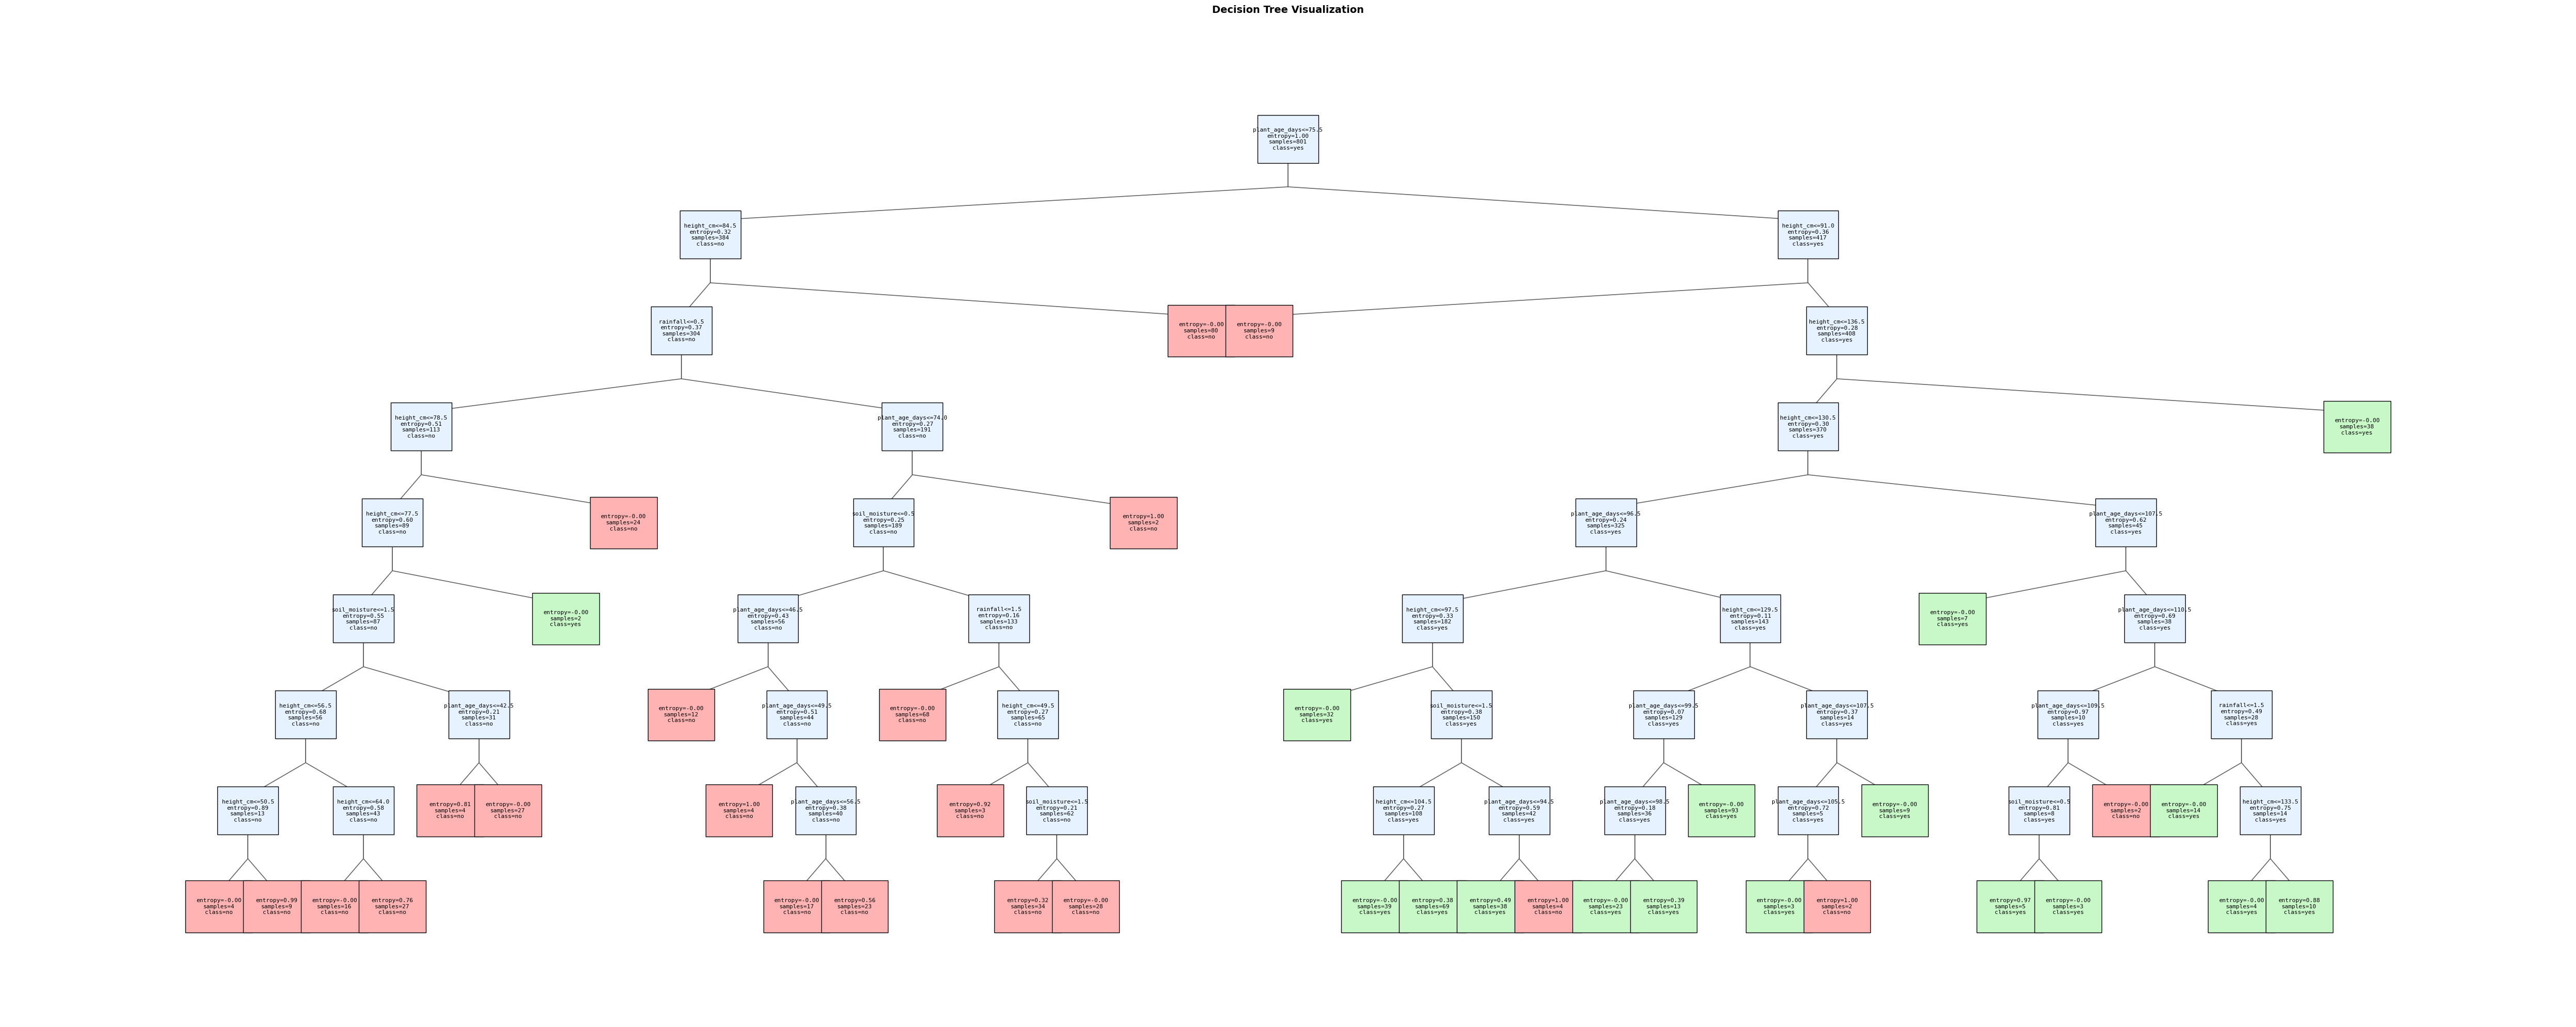


2. Feature Usage:


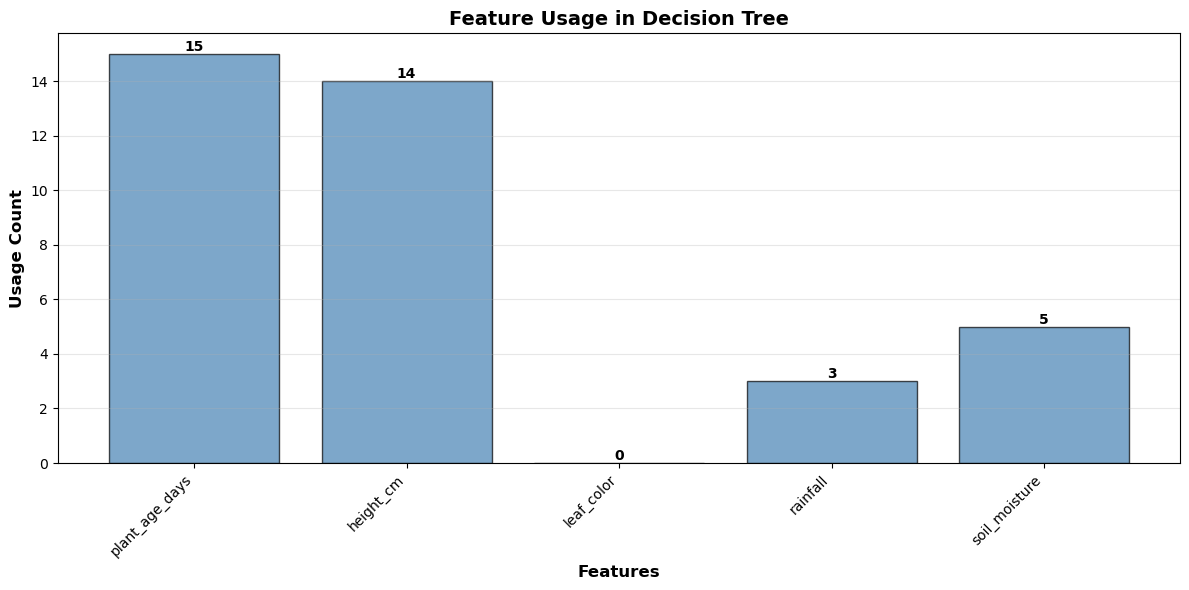


3. Decision Path untuk sample:

Sample features:
  plant_age_days: 85
  height_cm: 97
  leaf_color: dark_green
  rainfall: low
  soil_moisture: low

Actual: yes


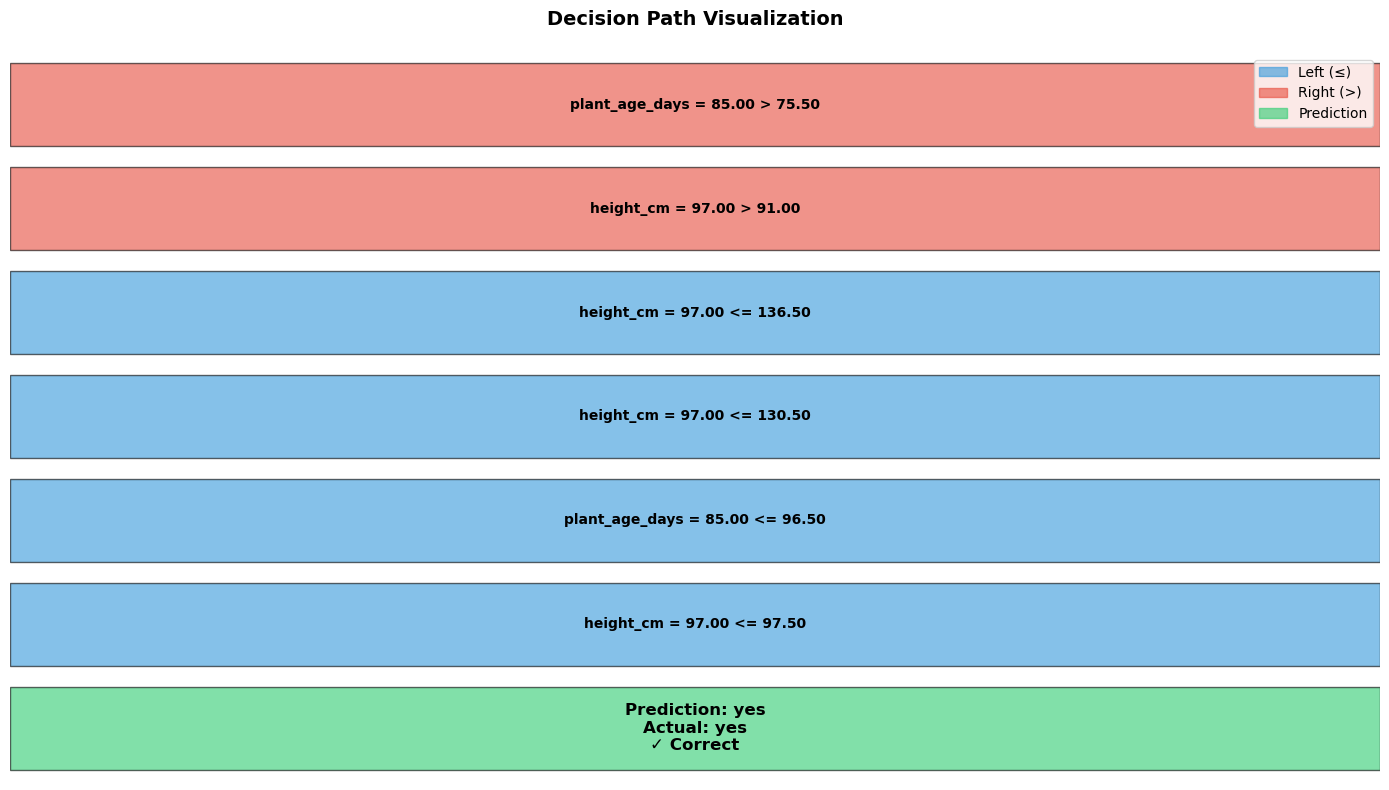

In [8]:
viz = TreeVisualizer(
    tree_model=clf,
    feature_names=feature_names,
    class_names=encoder.classes_.tolist()
)

print("=" * 70)
print("VISUALISASI DECISION TREE")
print("=" * 70)

print("\n1. Struktur Tree:")
viz.plot_tree_graph(X_train, y_train, figsize=(50, 20), fontsize=8)

print("\n2. Feature Usage:")
viz.plot_feature_usage(figsize=(12, 6))

print("\n3. Decision Path untuk sample:")
sample_idx = 0 
sample_data = X_test[sample_idx]
actual_label = y_test[sample_idx]

print(f"\nSample features:")
print(f"  plant_age_days: {sample_data[0]}")
print(f"  height_cm: {sample_data[1]}")
print(f"  leaf_color: {leaf_encoder.classes_[int(sample_data[2])]}")
print(f"  rainfall: {rainfall_encoder.classes_[int(sample_data[3])]}")
print(f"  soil_moisture: {moisture_encoder.classes_[int(sample_data[4])]}")
print(f"\nActual: {encoder.classes_[actual_label]}")

viz.plot_decision_paths(sample_data, actual_label, figsize=(14, 8))